## Diabetes Prediction

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
import  pandas as pd 
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
                                               'sex',
                                               'bmi',
                                               'bp',
                                               's1',
                                               's2',
                                               's3',
                                               's4',
                                               's5',
                                               's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
## Independent and Dependent feature 
X = df_diabetes
y=dataset['target']

In [8]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [9]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [10]:
## correlation
m = X_train.corr()

<Axes: >

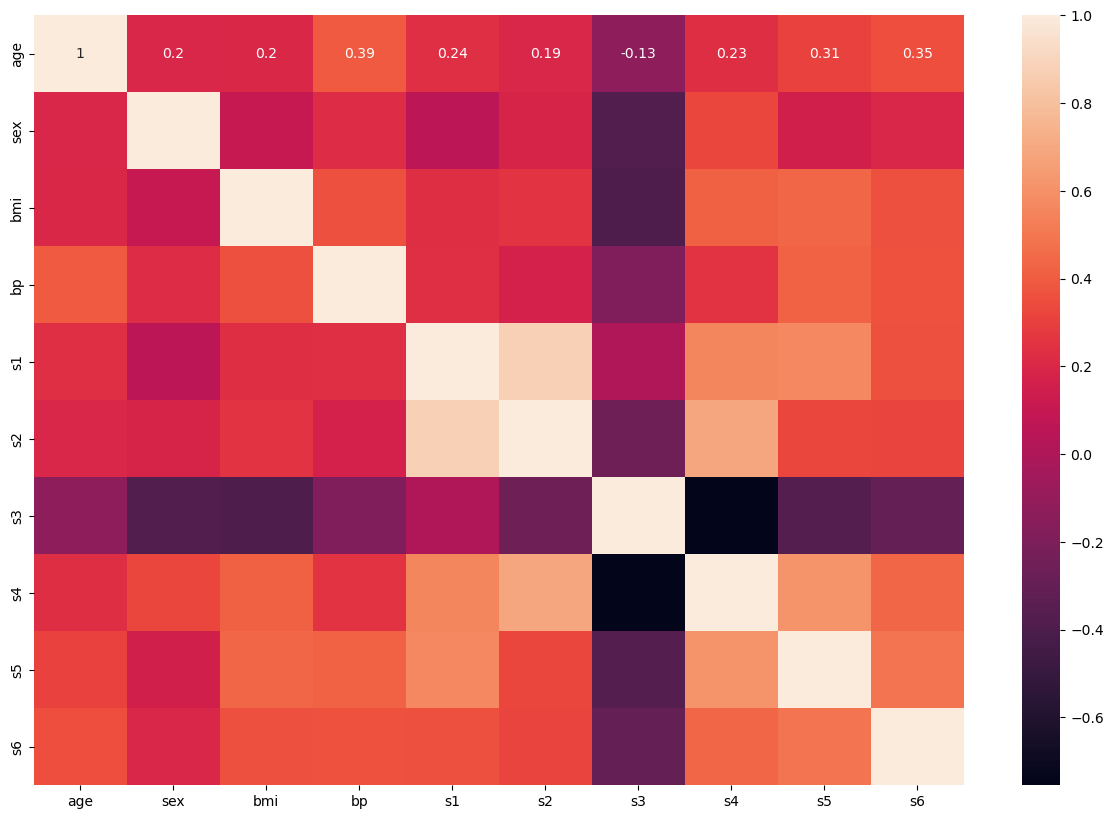

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(m, annot=True)



In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [13]:
param = {
    'criterion' : ['Squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features': ['auto','sqrt','log2',None]
}

In [14]:
param

{'criterion': ['Squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
regressor = DecisionTreeRegressor()

In [17]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['Squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [20]:
## Prediction
y_pred = grid.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.31602544816515743
52.0266234501209
4327.966001381986


In [25]:
selectedmodel = DecisionTreeRegressor(criterion='friedman_mse',max_depth=4, max_features='log2',splitter='random')

In [26]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.45535714285714285, 0.9, 'x[7] <= -0.013\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.19642857142857142, 0.7, 'x[2] <= -0.061\nfriedman_mse = 3094.691\nsamples = 115\nvalue = 110.07'),
 Text(0.10714285714285714, 0.5, 'x[6] <= 0.177\nfriedman_mse = 1301.374\nsamples = 19\nvalue = 85.316'),
 Text(0.07142857142857142, 0.3, 'x[2] <= -0.066\nfriedman_mse = 953.127\nsamples = 18\nvalue = 80.611'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 606.024\nsamples = 13\nvalue = 76.231'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 1676.0\nsamples = 5\nvalue = 92.0'),
 Text(0.14285714285714285, 0.3, 'friedman_mse = 0.0\nsamples = 1\nvalue = 170.0'),
 Text(0.2857142857142857, 0.5, 'x[5] <= -0.01\nfriedman_mse = 3304.343\nsamples = 96\nvalue = 114.969'),
 Text(0.21428571428571427, 0.3, 'x[4] <= -0.026\nfriedman_mse = 3786.57\nsamples = 69\nvalue = 121.333'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 4095.823\nsamples = 47\nvalue = 125.532'),
 Text(0.25, 0.1,

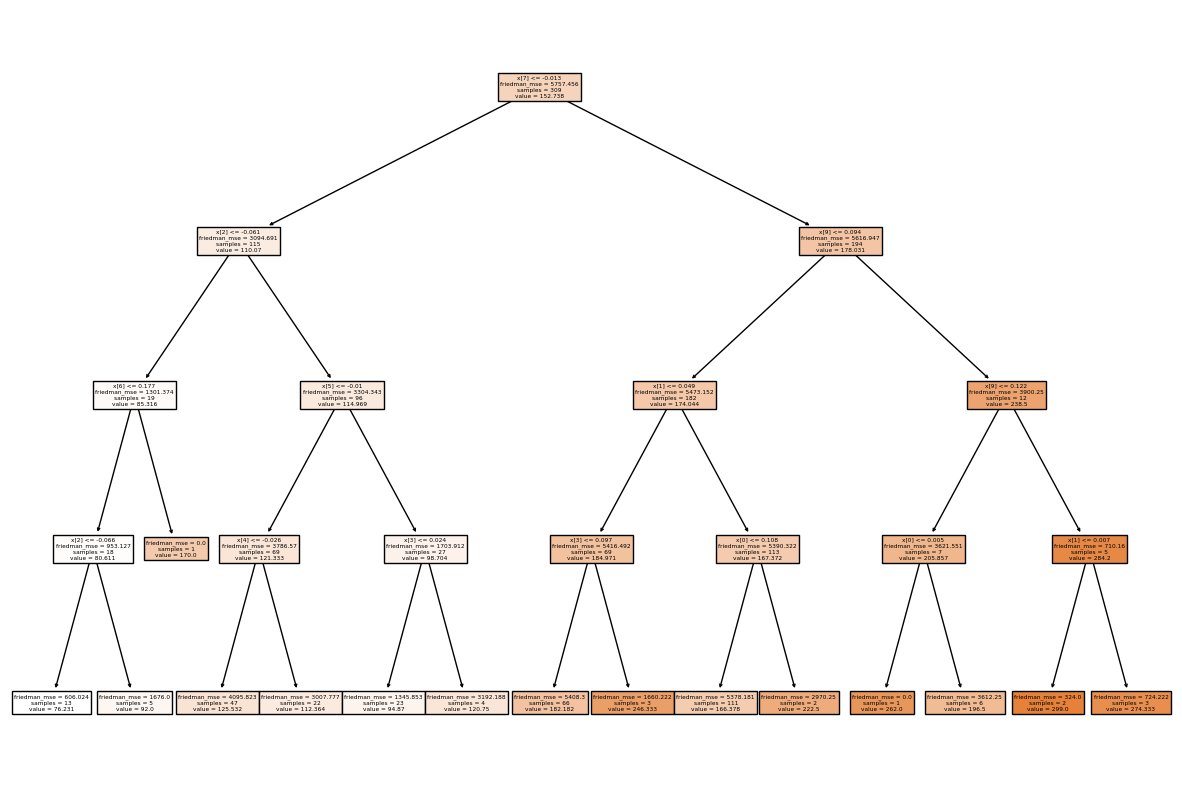

In [27]:
## Visualize the Decision tree 
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)